In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyathena as pa
import pandas as pd
import xarray as xr
import glob
import os

Reading a history file:G:/yeongu//RPS_8pc_noICM_newacc/hst/RPS_8pc_noICM_newacc.hst.p
Reading a history file:G:/yeongu//RPS_8pc_ICM1_newacc/hst/RPS_8pc_ICM1_newacc.hst.p
Reading a history file:G:/yeongu//RPS_8pc_ICM2_newacc/hst/RPS_8pc_ICM2_newacc.hst.p
Reading a history file:G:/yeongu//RPS_8pc_ICM3_newacc/hst/RPS_8pc_ICM3_newacc.hst.p
Reading a history file:G:/yeongu//RPS_4pc_ICM1_newacc/hst/RPS_4pc_ICM1_newacc.hst.p
Reading a history file:G:/yeongu//RPS_4pc_ICM2_newacc/hst/RPS_4pc_ICM2_newacc.hst.p


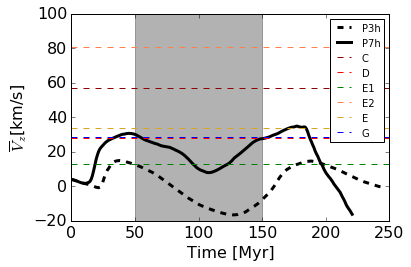

In [9]:
import astropy.constants as c
import astropy.units as u
unit=pa.set_units(muH=1.4271)

plt.rcParams['font.size']=16
import os,glob
labels=['noICM_new','ICM1_new','ICM2_new'] # ['no ICM','ICM00','ICM0']#,'ICM00','ICM0',,'ICM2','ICM3','ICM4'
ids=['RPS_8pc_noICM_newacc','RPS_8pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_8pc_ICM3_newacc','RPS_4pc_ICM1_newacc','RPS_4pc_ICM2_newacc'] # RPS_8pc_ICM00','RPS_8pc_ICM0',,'RPS_8pc_ICM2','RPS_8pc_ICM3','RPS_8pc_ICM4'
#ids=['R8_8pc_metal','RPS_8pc_ICM0','RPS_8pc_ICM1','RPS_8pc_ICM2','RPS_8pc_ICM3']
base='G:/yeongu/'
#base='/media/woorak/data2/yeongu/' # for ubuntu
#base='F:/yeongu/'
#base2='D:/yeongu/'
#C = ('darkkhaki','b','r','k','g','magenta','cyan') # 
C = ('salmon','r','deepskyblue','b','g')
C2 = ('darkblue','deepskyblue','goldenrod','red','firebrick')
CC = ('darkred','red','green','coral','goldenrod','blue')
hh = [0.006,0.006,0.15]
labell = ('No ICM', 'P3', 'P7','P14','P3h','P7h')  # r'No ICM',
kb = 1.3806504 * 1e-16 #boltzmann constant erg/K / erg = g cm2/s2
meter = 3.24078*1e-17 # pc
kg = 5.02785*1e-31 # solar mass
#fig =plt.figure(figsize=(7.5,12))
k=1
crit = 94
#plt.figure(figsize=(6,4))
plt.figure(figsize=(6,4))
lss=['--','-','-','-','--','-','-']
for j,problem_id in enumerate(ids):
    
    #rstfiles=glob.glob('%s%s/id0/%s.????.rst' % (base,problem_id,problem_id))
    #rstfiles+=glob.glob('%s%s/rst/%s.????.rst' % (base,problem_id,problem_id))
    parfile='{}/{}/{}.par'.format(base,problem_id,problem_id)
    hstfile='{}/{}/hst/{}.hst'.format(base,problem_id,problem_id)
    hst=pa.hst_reader(hstfile)
    #print unit
    Myr=unit['time'].to('Myr').value
    #print unit['density']
    hst.index=hst.time
    hst=hst.loc[250:500,:]
    hst.index=hst.time*Myr
    
    #sfr= hst.sfr10
    
    par=pa.get_params(parfile)
    
    Lx=par['x1max']-par['x1min']
    Ly=par['x2max']-par['x2min']
    Lz=par['x3max']-par['x3min']
    
    plist=['phase1','phase2','phase3']
    datasets = xr.Dataset()
    for phase in plist:
        path='{}{}/zprof_merged/{}.{}.zprof.nc'.format(base,problem_id,problem_id,phase)
        with xr.open_dataarray(path) as da: da.load()
        #print da
        datasets[phase]=da
    zprof_ds=datasets
    zprof_ds = zprof_ds.sel(taxis=slice(250,500))
    #print zprof_ds
    #cold = (zprof_ds['phase1']+zprof_ds['phase2']+zprof_ds['phase3']).loc['d']
    Munit=(unit['density']*unit['velocity']*unit['time']).to('Msun/pc^2').value
    #print zprof_ds['phase1'].loc['A'].data.cumsum(), zprof_ds['phase2'].loc['A']
    zprof = zprof_ds.to_array().sum(dim='variable')
    #print zprof
    #print zprof
    #print '------------------------'
    #print zprof.loc['d']
    #print zprof.loc['ge']
    M3 = zprof.loc['M3']
    d = zprof.loc['d']
    #print M3.shape
    if j==4 or j==5:
        #z_mean=np.mean(M3[896::,:]/d[896::,:],axis=0)
        vz_mean=np.sum(M3[896::,:],axis=0)/np.sum(d[896::,:],axis=0)
    else:
        #z_mean=np.mean(M3[448::,:]/d[448::,:],axis=0)
        vz_mean=np.sum(M3[448::,:],axis=0)/np.sum(d[448::,:],axis=0)
    
    #d = zprof.loc['d'].data*unit['density']/(1024.*1024)*(6.767e-8)#*(8*8*8) # solar mass / pc3 to g / km3
    t = (zprof.taxis-250)*Myr
    if j==4 or j==5:
        plt.plot(t,vz_mean,c='k',lw=3,label='%s' % labell[j],ls=lss[j])
    if j==5:
        plt.axvspan(50,150,fc='k',alpha=0.3)
        plt.axhline(56.8,ls='--',label='C',c=CC[0])
        plt.axhline(28.1,ls='--',label='D',c=CC[1])
        plt.axhline(12.9,ls='--',label='E1',c=CC[2])
        plt.axhline(80.7,ls='--',label='E2',c=CC[3])
        plt.axhline(33.6,ls='--',label='E',c=CC[4])
        plt.axhline(28.7,ls='--',label='G',c=CC[5])
plt.xlabel('Time [Myr]')
plt.ylabel(r'$\overline{V}$$_z$' + r'[km/s]')
plt.xlim(0,250)
plt.ylim(-20,100)
plt.legend(loc='upper right',fontsize=10)
plt.tight_layout()
plt.savefig('vel_z2_%s_combine.png' % labell[j],dpi=400)
plt.show()
    
    #z = zprof.zaxis/1000.
    #print M3[448::,0]
    #plt.plot(M3[448::,0]/d[448::,0],label='250 Myr')
    #plt.plot(M3[448::,50]/d[448::,50],label='300 Myr')
    #plt.plot(M3[448::,100]/d[448::,100],label='350 Myr')
    #plt.plot(M3[448::,150]/d[448::,150],label='400 Myr')
    #plt.plot(M3[448::,200]/d[448::,200],label='450 Myr')
    #plt.legend(loc=0,fontsize=10)
    #plt.show()
#plt.tight_layout()
#plt.savefig('D:/yeongu/plots/paperplot/new/Press_range_w_mag_all.png')
#plt.show()
    


In [62]:
a = [1.,2.,3.,4.,5.,6.,7.,8.,9.,10.]
b = [10,9,8,7,6,5,4,3,2,1]
print np.mean(np.divide(a,b))

2.2218650793650796
